In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('dataset_caba.csv')

data = data.loc[data.property_type != 'store']

In [2]:
#Convertimos a dummy la disposicion
df_dummies = data

df_dummies = pd.concat([data, pd.get_dummies(data = data['disposicion'], prefix= 'disp_')], axis = 1)

#Convertimos a dummy los barrios
df_dummies = pd.concat([df_dummies, pd.get_dummies(data = data['place_name_normalized'], prefix= 'barrio_place_name_normalized')], axis = 1)

#Convertimos a dummy los barrios
df_dummies = pd.concat([df_dummies, pd.get_dummies(data = data['property_type'], prefix= 'tipo_name_property_type')], axis = 1)



In [3]:
# quitamos columnas 

df_dummies = df_dummies.drop(['Unnamed: 0','price','surface_total_in_m2','surface_covered_in_m2','lat','lon','property_type','description','title','lat-lon','Point','place_name','place_name_normalized','disposicion'], axis=1)

#Reseteo el index
df_dummies.reset_index(inplace=True, drop=True)

#df_dummies = df_dummies.loc[df_dummies.rooms < 7]
#df_dummies = df_dummies.loc[df_dummies.price_usd_per_m2 < 5000]
#df_dummies = df_dummies.loc[df_dummies.surface_total_in_m2 < 300]
df_dummies.describe()


,price_usd_per_m2,floor,rooms,aAstrenar,garage,disp__contrafrente,disp__frente,disp__lateral,barrio_place_name_normalized_Agronomía,barrio_place_name_normalized_Almagro,...,barrio_place_name_normalized_Villa Pueyrredón,barrio_place_name_normalized_Villa Real,barrio_place_name_normalized_Villa Riachuelo,barrio_place_name_normalized_Villa Santa Rita,barrio_place_name_normalized_Villa Soldati,barrio_place_name_normalized_Villa Urquiza,barrio_place_name_normalized_Villa del Parque,tipo_name_property_type_PH,tipo_name_property_type_apartment,tipo_name_property_type_house
count,6788.000000,6788.000000,6788.000000,6788.000000,6788.000000,6788.000000,6788.000000,6788.000000,6788.000000,6788.000000,...,6788.000000,6788.000000,6788.000000,6788.000000,6788.000000,6788.000000,6788.000000,6788.000000,6788.000000,6788.000000
mean,2531.312810,3.048615,2.420301,0.109163,0.431349,0.122275,0.854449,0.023276,0.001179,0.047879,...,0.004420,0.001179,0.000589,0.006040,0.000737,0.034915,0.007808,0.020919,0.978049,0.001031
std,892.207360,3.383890,1.360035,0.311867,0.495301,0.327627,0.352681,0.150791,0.034312,0.213525,...,0.066338,0.034312,0.024270,0.077489,0.027132,0.183577,0.088023,0.143125,0.146533,0.032099
min,208.713217,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1990.690691,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2396.263774,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2893.418269,5.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9850.000000,24.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:

normalizar = ['floor','rooms']
transformer = StandardScaler().fit(df_dummies[normalizar])

std_df = pd.DataFrame(transformer.transform(df_dummies[normalizar]))
std_df.columns = [i + '_std' for i in normalizar]
std_df

,floor_std,rooms_std
0,-0.014368,-0.309059
1,-0.309907,1.161599
2,-0.605447,1.896929
3,-0.605447,0.426270
4,2.645490,0.426270
...,...,...
6783,-0.309907,0.426270
6784,0.281172,-0.309059
6785,-0.605447,-0.309059
6786,-0.605447,-1.779718


In [ ]:
#dfdummies[normalizar] = std_df[['surface_total_in_m2_std','surface_covered_in_m2_std','price_std']]

In [6]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [7]:

X = df_dummies.drop(['price_usd_per_m2'], axis = 1)
y = df_dummies['price_usd_per_m2']

#Separamos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=500)


MAE: 458.2
MSE: 439576.95
RMSE: 663.01
R2: 0.4


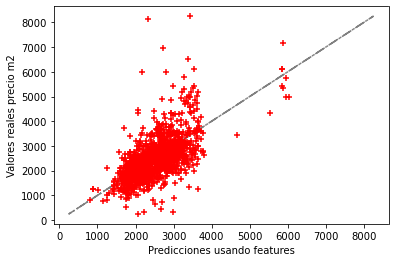

In [8]:

lm = linear_model.LinearRegression()

#Entrenamos el modelo
reg_lineal = lm.fit(X_train, y_train)
ypred = reg_lineal.predict(X_test)

print ('MAE:', metrics.mean_absolute_error(y_test, ypred).round(2))
print ('MSE:', metrics.mean_squared_error(y_test, ypred).round(2))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ypred)).round(2))
print ('R2:', r2_score(y_test, ypred).round(2))

plt.plot(y_test,y_test, '-.', c='grey')
plt.scatter(ypred, y_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando features")
plt.ylabel("Valores reales precio m2")
plt.show()


                            OLS Regression Results                            
Dep. Variable:       price_usd_per_m2   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     84.99
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:26:00   Log-Likelihood:                -40183.
No. Observations:                5091   AIC:                         8.048e+04
Df Residuals:                    5035   BIC:                         8.084e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

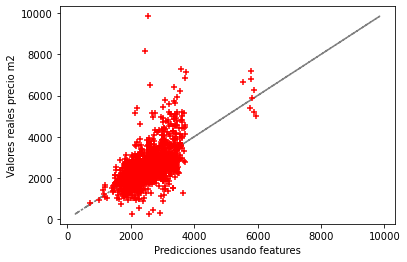

In [9]:
X = df_dummies.drop(['price_usd_per_m2'], axis = 1)
y = df_dummies['price_usd_per_m2']
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)
print (model.summary())
print ('MAE:', metrics.mean_absolute_error(y_test, predictions))
print ('MSE:', metrics.mean_squared_error(y_test, predictions))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

plt.plot(y_test,y_test, '-.', c='grey')
plt.scatter(predictions, y_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando features")
plt.ylabel("Valores reales precio m2")
plt.show()

Ridge

MAE:  463.9377938075479
MSE:  462994.32513391814
RMSE: 680.4368634443009
R2:   0.4244582729679526


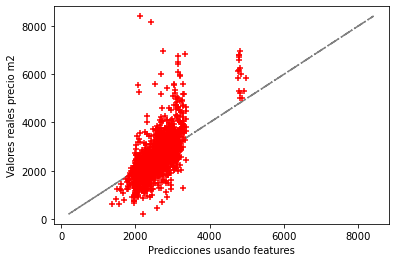

In [10]:
X = df_dummies.drop(['price_usd_per_m2'], axis = 1)
y = df_dummies['price_usd_per_m2']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)
ridgemodel = linear_model.Ridge(alpha= 0.5, normalize=True)
ridgemodel.fit(X_train, y_train)
y_pred = ridgemodel.predict(X_test)   

print ('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R2:  ', metrics.r2_score(y_test, y_pred))

plt.plot(y_test,y_test, '-.', c='grey')
plt.scatter(y_pred, y_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando features")
plt.ylabel("Valores reales precio m2")
plt.show()

Lasso

MAE:  455.06706921640654
MSE:  422153.8885045723
RMSE: 649.7337058399943
R2:   0.45350731087018625


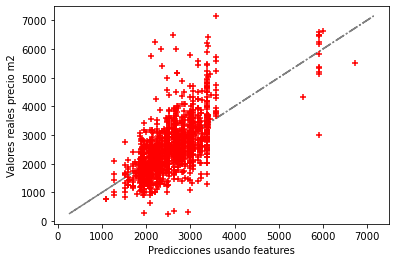

In [11]:
X = df_dummies.drop(['price_usd_per_m2'], axis = 1)
y = df_dummies['price_usd_per_m2']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)
model = linear_model.LassoCV(alphas=np.linspace(0.001,100, 1000),max_iter = 10000, cv=3, normalize=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print ('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R2:  ', metrics.r2_score(y_test, y_pred))

plt.plot(y_test,y_test, '-.', c='grey')
plt.scatter(y_pred, y_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando features")
plt.ylabel("Valores reales precio m2")
plt.show()